In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Define the function to calculate real values for celsius to farenheit 
def convert_celsius_to_farenheit(celsius):
    return (1.8 * celsius + 32)

In [3]:
#Creating a interval for celsius 
celsius_values = torch.linspace(-10, 40, 20)  # 20 Examples of -10 to 40 celsius degrees
farenheit_values = convert_celsius_to_farenheit(celsius_values.numpy())
#temp_celsius = [20,40]
temp_celsius = [-10,-20,20,28,30, 40, 50]
temp_farenheit = [convert_celsius_to_farenheit(temp) for temp in temp_celsius]

In [4]:
df = pd.DataFrame({'Celsius': temp_celsius, 'Farenheit': temp_farenheit})
df

,Celsius,Farenheit
0,-10,14.0
1,-20,-4.0
2,20,68.0
3,28,82.4
4,30,86.0
5,40,104.0
6,50,122.0


In [5]:
x = torch.FloatTensor(df.Celsius.values.astype(float))
y = torch.FloatTensor(df.Farenheit.values.astype(float))
y = y.unsqueeze(1)

In [6]:
#defining class for the model
class CelsiusFarenheintModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_layer = nn.Linear(in_features=1,out_features=1,bias=True)
    
    def forward(self,x):
        out = self.input_layer(x)
        return out

In [7]:

EPOCHS = 1000
LR = 0.2

In [8]:
model = CelsiusFarenheintModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)

In [9]:
x = x.view(x.size(0),-1)

In [10]:
weights = []
bias = []
predictions_by_epoch = {}
for epoch in range(EPOCHS):
    
    outputs = model.forward(x)
    
    loss = criterion(outputs, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    weights.append(model.input_layer.weight.item())
    
    bias.append(model.input_layer.bias.item())
    if epoch % 100 == 0:
        temp_predictions = model.forward(celsius_values.unsqueeze(1)).detach().numpy()
        predictions_by_epoch[epoch] = temp_predictions
    
print(f'Weight: {model.input_layer.weight.item():.2f} Bias: {model.input_layer.bias.item():.2f}')

Weight: 1.80 Bias: 32.00


In [11]:
training_data = pd.DataFrame({'Weights':weights, 'Bias':bias})
training_data.to_csv('ml_examples/celsius_to_farenheit/celsius_to_farenheit_training_data.csv',index=False)

In [12]:
training_data.head()

,Weights,Bias
0,-0.268440,1.121709
1,-0.068951,1.321337
2,0.129627,1.520314
3,0.326844,1.718336
4,0.522195,1.915071


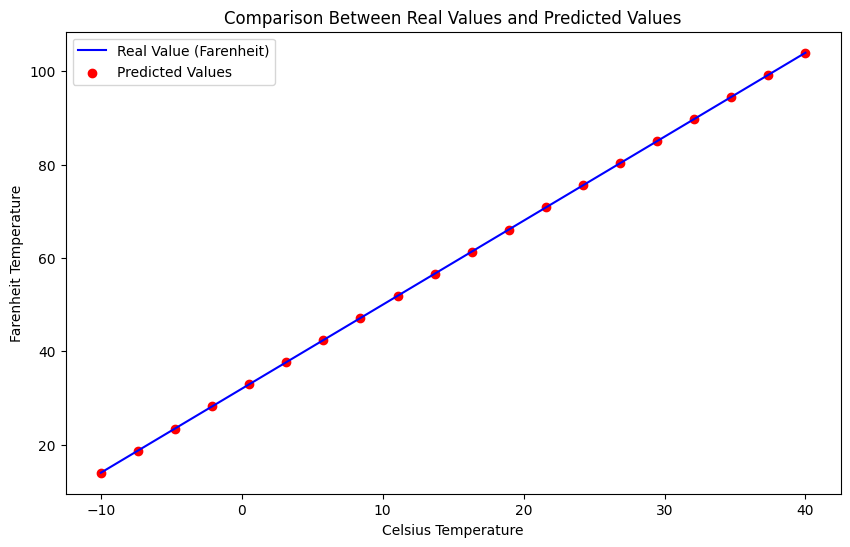

In [13]:
#Creating a interval for celsius 
celsius_values = torch.linspace(-10, 40, 20)  # 20 Examples of -10 to 40 celsius degrees
farenheit_values = convert_celsius_to_farenheit(celsius_values.numpy())

# Predictions
predictions = model.forward(celsius_values.unsqueeze(1)).detach().numpy()

# Creating graphic
plt.figure(figsize=(10, 6))
plt.plot(celsius_values.numpy(), farenheit_values, label='Real Value (Farenheit)', color='blue')  # real value line
plt.scatter(celsius_values.numpy(), predictions, color='red', label='Predicted Values')  # Predictions dots

# Adding labels
plt.title('Comparison Between Real Values and Predicted Values')
plt.xlabel('Celsius Temperature')
plt.ylabel('Farenheit Temperature')
plt.legend()

# Show graphic
plt.show()

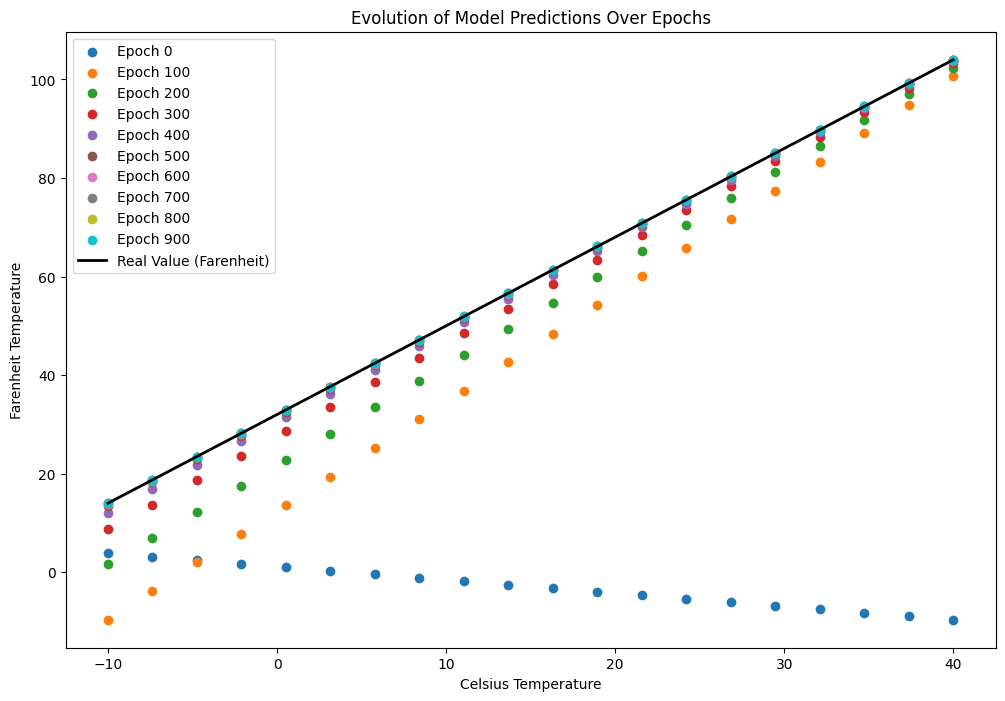

In [14]:
plt.figure(figsize=(12, 8))

# predictions from different epochs
for epoch in predictions_by_epoch:
    plt.scatter(celsius_values.numpy(), predictions_by_epoch[epoch], label=f'Epoch {epoch}')

# Adding real value line
plt.plot(celsius_values.numpy(), farenheit_values, label='Real Value (Farenheit)', color='black', linewidth=2)

# Adding labels
plt.title('Evolution of Model Predictions Over Epochs')
plt.xlabel('Celsius Temperature')
plt.ylabel('Farenheit Temperature')
plt.legend()

# Show graphic
plt.show()


In [15]:
torch.save(model.state_dict(), 'ml_examples/celsius_to_farenheit/celsius_farenheit_model.pth')#save the model